<a href="https://colab.research.google.com/github/fcarcamo03/PROG/blob/main/metodo1_percentiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
options(repr.plot.width=12, repr.plot.height=10)

In [79]:
#install.packages("dplyr")
#install.packages("ggplot2")
library("dplyr")
library("ggplot2")

In [80]:
#carga archivo
datosPaises <- read.csv("https://raw.githubusercontent.com/fcarcamo03/PROG/main/CONTROL%201/DatosPaises.csv", sep = ";", header = TRUE)
head(datosPaises)

,PAIS,PIB,POB,IDH,GINI,IPC,FAO,GENERO,ELECTRICIDAD,ESCOLARIDAD,⋯,TURISMO,INTERNET,VIOLENCIA,VIDA,CELULAR,DESERCION,PRISION,RENOVABLE,PARLAMENTO,INMIGRANTES
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Qatar,127.54265,2.169,0.8498,29.95,107.07,1.75,0.524,98,13.79,⋯,2.611,91.49,38.3,78.2,145.76,2.26,60,0.00,0.00,73.82
2,Luxembourg,87.77164,0.543,0.8919,29.00,108.01,1.27,0.100,100,13.88,⋯,0.945,94.67,39.5,81.7,148.37,5.60,122,3.98,28.33,43.25
3,Kuwait,82.36923,3.250,0.8163,29.00,111.19,2.60,0.387,98,14.75,⋯,0.300,78.70,39.5,74.4,218.43,5.93,137,0.00,1.54,60.21
4,Singapore,76.24004,5.399,0.9118,29.95,112.65,1.02,0.088,100,15.40,⋯,11.900,82.00,9.2,83.0,158.13,1.32,230,2.79,25.25,42.93
5,Brunei,69.44976,0.418,0.8556,29.00,102.88,2.95,0.064,76,14.53,⋯,0.225,68.77,39.5,78.8,110.06,3.63,122,0.00,23.17,49.35
6,Norway,62.45083,5.084,0.9439,26.83,104.19,1.51,0.067,100,17.49,⋯,4.963,96.30,26.8,81.6,116.51,1.51,72,47.75,39.64,13.77


In [81]:
#INTERNET sin datos atipicos
datosPaises <- datosPaises %>%
  mutate(
    outlier = ifelse( INTERNET > quantile(INTERNET,0.03) & INTERNET < quantile(INTERNET,0.97) , "No outlier", "Outlier")
  )

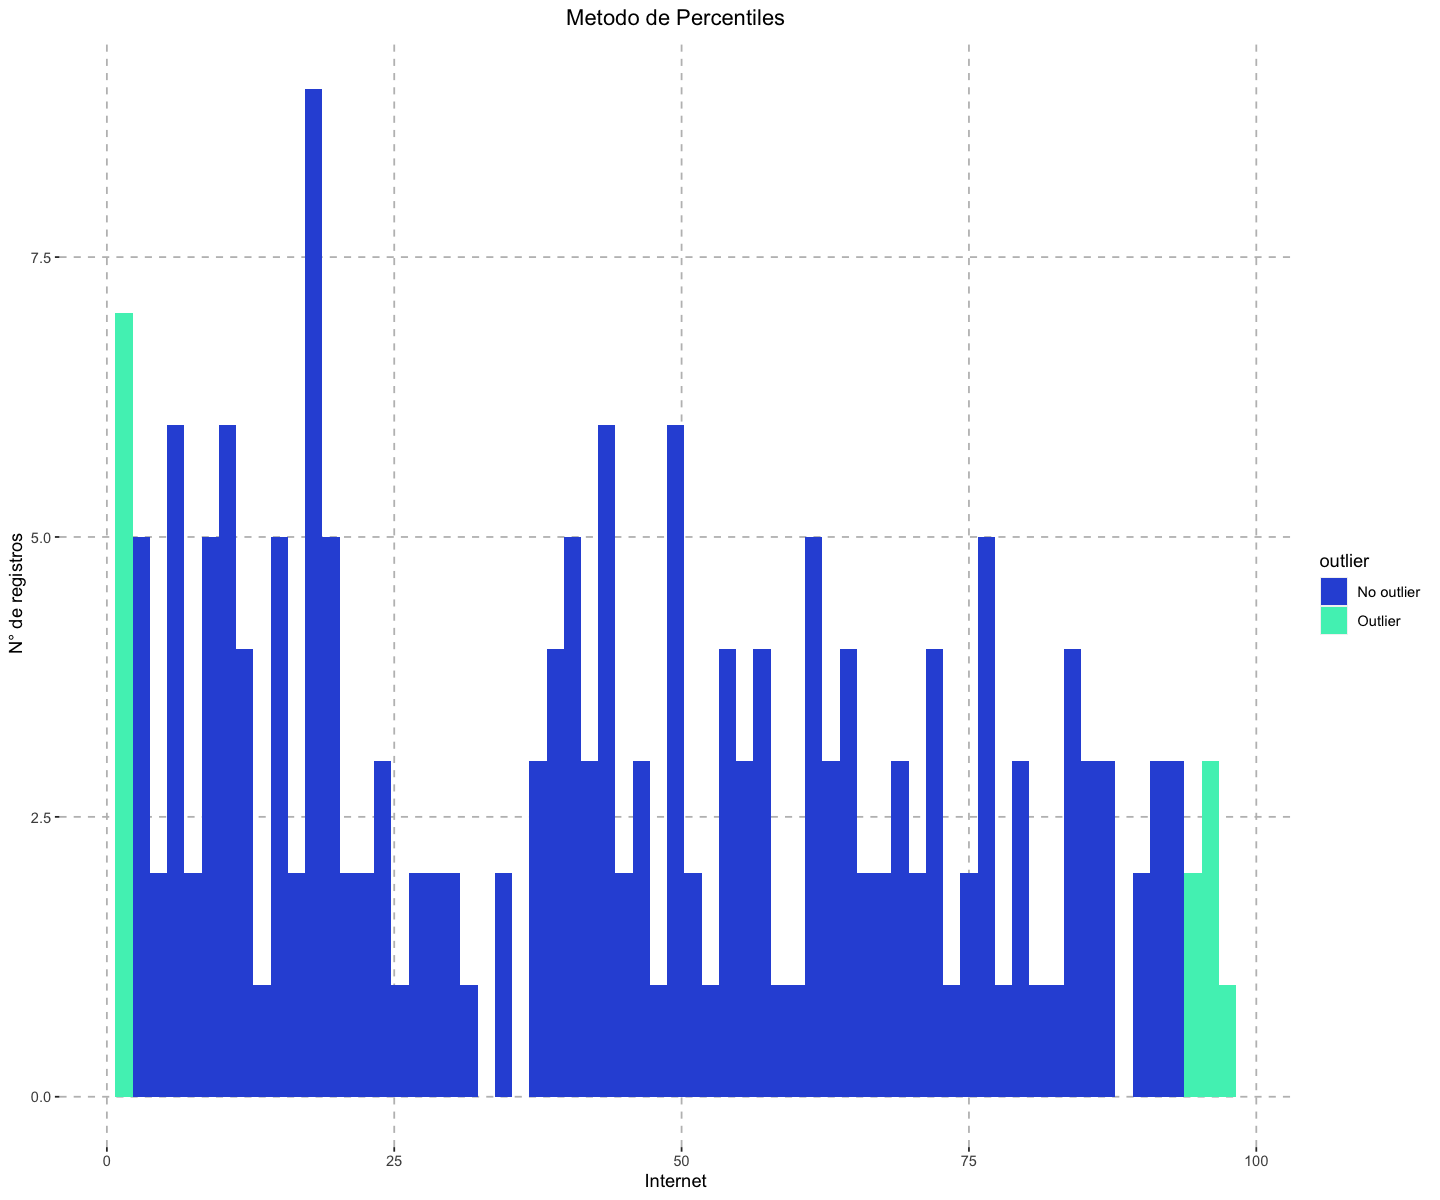

In [87]:

grafico_percentiles <- datosPaises %>%
  ggplot() +
  aes(x = INTERNET, fill = outlier) +
  geom_histogram(binwidth = 1.5) +
  scale_fill_manual(values = c("No outlier" = "#3057D9", "Outlier" = "#4AF0BF"))+
  theme(panel.background = element_rect(fill = "white"),
        panel.grid.major = element_line(color = "gray", linetype = "dashed"))+
  ggtitle(label = "Metodo de Percentiles")+
  xlab("Internet") +
  ylab("N° de registros")+
  theme(plot.title = element_text(hjust = 0.5))

ggsave("internet_percentiles.svg.png", plot = grafico_percentiles, width = 8, height = 6, dpi = 300)

grafico_percentiles

In [83]:
df_percentiles <- datosPaises %>% filter( outlier == "Outlier")
df_percentiles %>% select(PAIS,PIB,INTERNET)

PAIS,PIB,INTERNET
<chr>,<dbl>,<dbl>
Luxembourg,87.7716390,94.67
Norway,62.4508261,96.30
Denmark,41.9878874,95.99
Iceland,41.2383901,98.16
Liechtenstein,41.0657133,95.21
Andorra,41.0657133,95.90
Myanmar,5.2998835,2.10
East Timor,2.0365535,1.14
Sierra Leone,1.4954038,2.10


In [84]:
#ggplot(datosPaises, aes(x = PIB, y = INTERNET)) +
  #geom_point() +
  #geom_smooth(method = "lm")

#ggplot(datos_Per, aes(x = PIB, y = INTERNET)) +
  #geom_point() +
  #geom_smooth(method = "lm")

In [85]:
mean(datosPaises$INTERNET) # original
mean(df_percentiles$INTERNET) # filtrado que no contiene outliers

sd(datosPaises$INTERNET)
sd(df_percentiles$INTERNET)

cor(datosPaises$PIB, datosPaises$INTERNET)
cor(df_percentiles$PIB, df_percentiles$INTERNET)

[1] 44.11293

[1] 45.20077

[1] 28.92764

[1] 48.99546

[1] 0.766723

[1] 0.9008101